In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

%matplotlib notebook

%matplotlib inline

In [3]:
df= pd.read_csv('/Users/prachisadarangani/Documents/Syracuse University /fALL 2023 SEM 3/AML/Assignment 4 /HW4-data-fedPapers85(1).csv')

In [4]:
df.head()
df.tail()
df['author'].unique()

array(['dispt', 'Hamilton', 'HM', 'Jay', 'Madison'], dtype=object)

In [5]:
#preproccessing

df = df.drop('filename',axis=1)
X= df.drop('author', axis=1)
Y= df['author']


In [6]:
#scaling
sc = StandardScaler()
X= sc.fit_transform(X)
X

array([[-0.17335958, -0.03555411,  0.1604482 , ...,  0.28664215,
         1.2169828 , -0.2100036 ],
       [-1.52248232,  0.43265847,  0.63897793, ..., -0.65347038,
         0.50255649, -0.2100036 ],
       [ 0.59943889,  1.58190752,  0.04081577, ..., -1.35855477,
        -0.45450517, -0.2100036 ],
       ...,
       [-1.52248232, -0.03555411,  4.70648059, ...,  0.75669842,
        -1.08805304, -0.2100036 ],
       [-0.6579959 ,  1.6244723 ,  0.04081577, ..., -0.73181309,
        -1.06109355, -0.2100036 ],
       [ 0.70422512,  1.87986098, -0.07881666, ...,  0.12995673,
        -0.25230905, -0.2100036 ]])

In [7]:
#performing PCA on this

pca = PCA()
X_pca = pca.fit_transform(X)

/Users/prachisadarangani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'PC2')

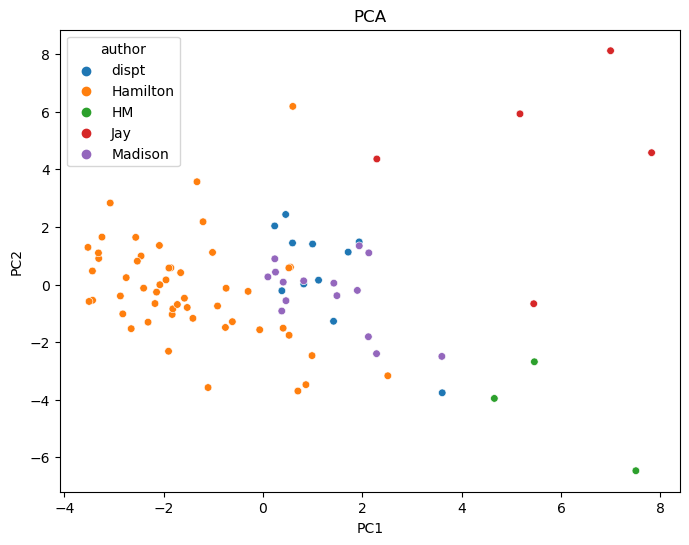

In [8]:
#plotting it
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue = Y, s=30)

plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")


In [9]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_pca)
                for k in range(1, 10)]


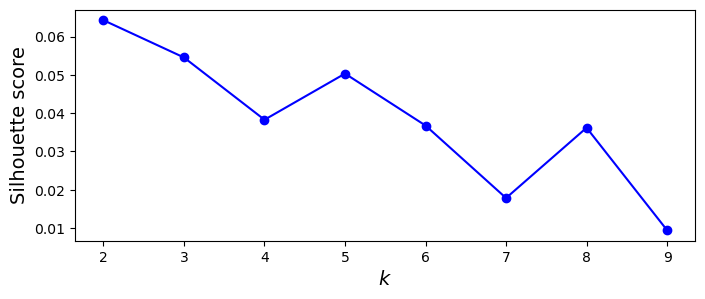

In [10]:
silhouette_scores = [silhouette_score(X_pca, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

In [11]:
#lets make 5 clusters
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(X_pca)
pred = kmeans.predict(X_pca)

/Users/prachisadarangani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'PC2')

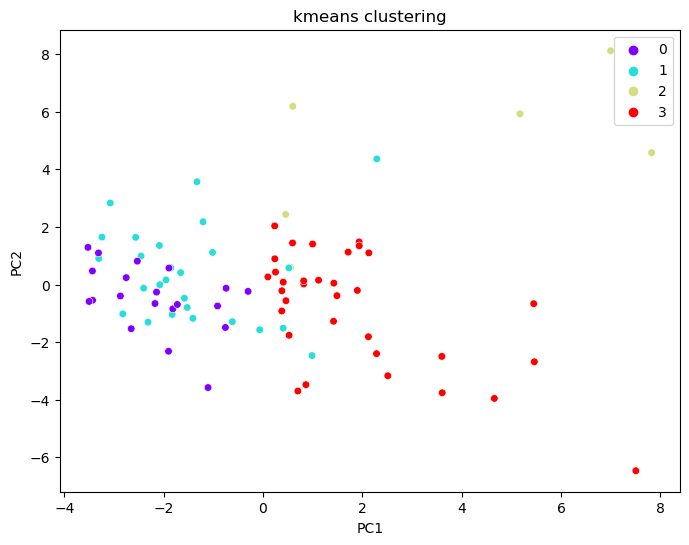

In [12]:
#plotting
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue = pred, palette ='rainbow', s=30)

plt.title("kmeans clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [13]:

df['kmeans labels'] = kmeans.labels_


In [14]:
df[df['author'] == 'dispt']
#we can see most dispt kmean labels are 0 

,author,a,all,also,an,and,any,are,as,at,...,were,what,when,which,who,will,with,would,your,kmeans labels
0,dispt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,0.017,...,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0,3
1,dispt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,0.114,...,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0,3
2,dispt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,0.023,...,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0,3
3,dispt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,0.056,...,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0,3
4,dispt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,0.013,...,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0,3
5,dispt,0.245,0.059,0.007,0.067,0.282,0.052,0.111,0.252,0.015,...,0.030,0.015,0.037,0.186,0.045,0.111,0.089,0.037,0.0,3
6,dispt,0.349,0.036,0.007,0.029,0.335,0.058,0.087,0.073,0.116,...,0.029,0.015,0.007,0.211,0.022,0.145,0.073,0.073,0.0,2
7,dispt,0.414,0.083,0.009,0.018,0.478,0.046,0.110,0.074,0.037,...,0.009,0.009,0.000,0.175,0.018,0.267,0.129,0.037,0.0,3
8,dispt,0.248,0.040,0.007,0.040,0.356,0.034,0.154,0.161,0.047,...,0.007,0.020,0.020,0.201,0.040,0.154,0.027,0.040,0.0,3
9,dispt,0.442,0.062,0.006,0.075,0.423,0.037,0.093,0.100,0.031,...,0.000,0.025,0.012,0.199,0.031,0.106,0.081,0.031,0.0,3


In [15]:
df_label = df[df['kmeans labels']== 3]
df_label[df['author']!= 'dispt']

/var/folders/71/v_z1m6m95c709d46xmd64xy80000gn/T/ipykernel_4117/3699126231.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_label[df['author']!= 'dispt']


,author,a,all,also,an,and,any,are,as,at,...,were,what,when,which,who,will,with,would,your,kmeans labels
35,Hamilton,0.323,0.035,0.000,0.070,0.513,0.000,0.105,0.133,0.042,...,0.035,0.014,0.000,0.148,0.049,0.042,0.077,0.042,0.000,3
43,Hamilton,0.281,0.075,0.000,0.094,0.319,0.044,0.044,0.119,0.063,...,0.050,0.019,0.006,0.144,0.013,0.006,0.075,0.313,0.000,3
54,Hamilton,0.318,0.064,0.007,0.085,0.381,0.014,0.099,0.113,0.078,...,0.000,0.000,0.000,0.183,0.000,0.078,0.092,0.191,0.000,3
61,Hamilton,0.328,0.058,0.007,0.087,0.313,0.029,0.102,0.138,0.073,...,0.058,0.000,0.000,0.182,0.022,0.051,0.102,0.058,0.000,3
62,HM,0.229,0.040,0.000,0.034,0.532,0.013,0.013,0.081,0.027,...,0.108,0.000,0.020,0.081,0.074,0.007,0.074,0.040,0.000,3
63,HM,0.186,0.034,0.000,0.062,0.566,0.041,0.117,0.069,0.034,...,0.034,0.007,0.000,0.214,0.041,0.007,0.145,0.028,0.000,3
64,HM,0.225,0.054,0.018,0.045,0.494,0.000,0.117,0.090,0.072,...,0.000,0.000,0.027,0.117,0.027,0.036,0.072,0.009,0.000,3
65,Jay,0.236,0.026,0.017,0.009,0.733,0.009,0.052,0.131,0.087,...,0.061,0.017,0.026,0.096,0.070,0.017,0.096,0.044,0.000,3
70,Madison,0.359,0.020,0.000,0.069,0.590,0.020,0.133,0.093,0.039,...,0.000,0.025,0.005,0.192,0.044,0.147,0.049,0.029,0.000,3
71,Madison,0.221,0.034,0.007,0.062,0.407,0.021,0.048,0.159,0.048,...,0.014,0.014,0.000,0.276,0.007,0.179,0.048,0.034,0.034,3


In [16]:
df_label.groupby('author')['kmeans labels'].count()

author
HM           3
Hamilton     4
Jay          1
Madison     15
dispt       10
Name: kmeans labels, dtype: int64

In [17]:
#we can see that madison overlaps the most with the three label hence we can conclude that its written by madison 

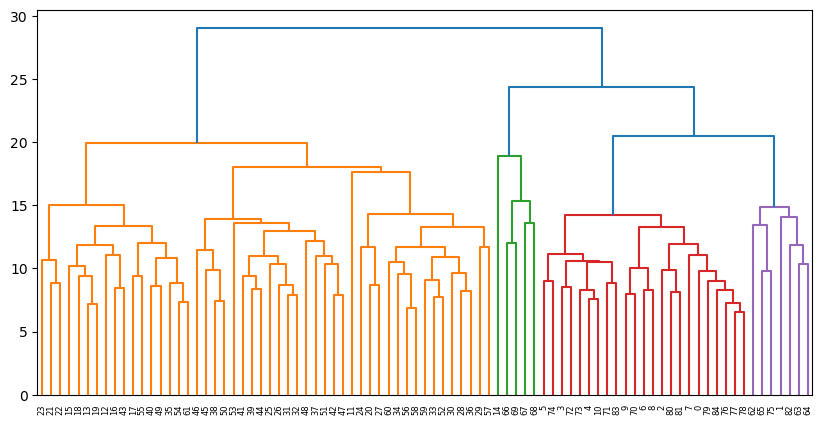

In [18]:
#now lets use the HAC method
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster

linkage = linkage(X_pca,'ward')
cluster_labels = fcluster(linkage, t=4, criterion='maxclust')
fig = plt.figure(figsize=(10, 5))
dendrogram(linkage)
plt.show()


In [19]:
df['cluster_label'] = cluster_labels

In [20]:
df[df['author'] == 'dispt']

,author,a,all,also,an,and,any,are,as,at,...,what,when,which,who,will,with,would,your,kmeans labels,cluster_label
0,dispt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,0.017,...,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0,3,3
1,dispt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,0.114,...,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0,3,4
2,dispt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,0.023,...,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0,3,3
3,dispt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,0.056,...,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0,3,3
4,dispt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,0.013,...,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0,3,3
5,dispt,0.245,0.059,0.007,0.067,0.282,0.052,0.111,0.252,0.015,...,0.015,0.037,0.186,0.045,0.111,0.089,0.037,0.0,3,3
6,dispt,0.349,0.036,0.007,0.029,0.335,0.058,0.087,0.073,0.116,...,0.015,0.007,0.211,0.022,0.145,0.073,0.073,0.0,2,3
7,dispt,0.414,0.083,0.009,0.018,0.478,0.046,0.110,0.074,0.037,...,0.009,0.000,0.175,0.018,0.267,0.129,0.037,0.0,3,3
8,dispt,0.248,0.040,0.007,0.040,0.356,0.034,0.154,0.161,0.047,...,0.020,0.020,0.201,0.040,0.154,0.027,0.040,0.0,3,3
9,dispt,0.442,0.062,0.006,0.075,0.423,0.037,0.093,0.100,0.031,...,0.025,0.012,0.199,0.031,0.106,0.081,0.031,0.0,3,3


In [21]:
df_3 = df[df['cluster_label']== 3]
df_3[df['author']!= 'dispt']

/var/folders/71/v_z1m6m95c709d46xmd64xy80000gn/T/ipykernel_4117/55008597.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3[df['author']!= 'dispt']


,author,a,all,also,an,and,any,are,as,at,...,what,when,which,who,will,with,would,your,kmeans labels,cluster_label
70,Madison,0.359,0.020,0.000,0.069,0.590,0.020,0.133,0.093,0.039,...,0.025,0.005,0.192,0.044,0.147,0.049,0.029,0.000,3,3
71,Madison,0.221,0.034,0.007,0.062,0.407,0.021,0.048,0.159,0.048,...,0.014,0.000,0.276,0.007,0.179,0.048,0.034,0.034,3,3
72,Madison,0.290,0.048,0.016,0.048,0.523,0.011,0.095,0.148,0.011,...,0.005,0.005,0.232,0.016,0.053,0.084,0.032,0.000,3,3
73,Madison,0.378,0.032,0.014,0.072,0.401,0.041,0.081,0.126,0.027,...,0.000,0.009,0.117,0.063,0.054,0.090,0.063,0.000,3,3
74,Madison,0.300,0.074,0.006,0.034,0.346,0.023,0.113,0.187,0.040,...,0.006,0.006,0.153,0.000,0.085,0.068,0.045,0.000,3,3
76,Madison,0.302,0.063,0.004,0.084,0.369,0.025,0.063,0.130,0.021,...,0.017,0.004,0.151,0.034,0.105,0.063,0.038,0.000,3,3
77,Madison,0.240,0.042,0.000,0.078,0.491,0.057,0.047,0.115,0.016,...,0.005,0.010,0.141,0.021,0.031,0.083,0.078,0.000,3,3
78,Madison,0.380,0.051,0.013,0.051,0.333,0.034,0.064,0.154,0.026,...,0.026,0.013,0.145,0.021,0.081,0.068,0.051,0.000,3,3
79,Madison,0.212,0.101,0.010,0.051,0.440,0.076,0.066,0.136,0.020,...,0.010,0.000,0.152,0.010,0.051,0.091,0.147,0.000,3,3
80,Madison,0.136,0.054,0.014,0.048,0.422,0.027,0.048,0.150,0.027,...,0.007,0.000,0.116,0.007,0.218,0.102,0.075,0.000,3,3


In [22]:
#we can see only madison belongs to cluster 3 

In [23]:
#let's use prediction method

In [24]:
#training and testing 

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='gini',    
    max_depth=None,    
    min_samples_split=2  
)

model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [46]:
#lets check the cv score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, cv=3)
scores

array([0.72413793, 0.82142857, 0.71428571])

In [47]:
y_train_pred = model.predict(X_train)

NameError: name 'y' is not defined